In [3]:
import pandas as pd
import pickle

embeddings = []

# read the 3 separate files with information regarding embeddings
for file in ['processed_data/all_restaurant_vectors_pt1',
             'processed_data/all_restaurant_vectors_pt2',
             'processed_data/all_restaurant_vectors_pt3']:

    # read file and obtain data for ids and restaurants
    with open(file, "rb") as pickle_file:
        restaurant_vectors = pickle.load(pickle_file)

        # add the data to our new lists with all information
        ids = restaurant_vectors[0]
        embeddings += restaurant_vectors[1]

# create dataframe from lists
restaurants = {'business_id': ids, 'embedding': embeddings}
restaurants = pd.DataFrame(data=restaurants)

# show results
restaurants

,business_id,embedding
0,---kPU91CF4Lq2-WlRu9Lw,"[0.0, 0.0012626262626262606, 0.0, 0.0, 0.00126..."
1,--0iUa4sNDFiZFrAdIWhZQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,--30_8IhuyMHbSOcNWd6DQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,--7PUidqRWpRSpXebiyxTg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,--7jw19RH9JKXgFohspgQw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,"[0.0, 0.0018939393939393927, 0.0, 0.0, 0.0, 0...."
150342,zztOG2cKm87I6Iw_tleZsQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150343,zzu6_r3DxBJuXcjnOYVdTw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150344,zzw66H6hVjXQEt0Js3Mo4A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
# import models
pca = pickle.load(open('models/price_score_pca.sav', 'rb'))
svm = pickle.load(open('models/price_score_model.sav', 'rb'))

# reduce the dimensions of the embeddings
pca_embedding = pca.transform(restaurants['embedding'].tolist())

# check the new embeddings
pca_embedding.shape

(150346, 64)

In [6]:
# obtain the price score for every restaurant
price_score = svm.predict(pca_embedding)

# check the price scores
price_score.shape

(150346,)

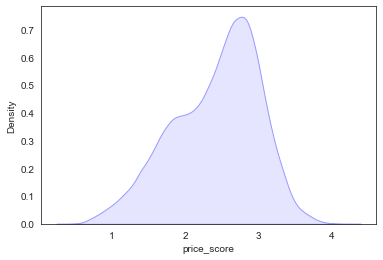

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# add price score to the dataframe
restaurants['price_score'] = price_score

# get a distribution of the price scores
sns.set_style('white')
sns.kdeplot(data=restaurants, x='price_score', color=[0.6, 0.6, 1.0], fill=True)
plt.show()

In [10]:
# import data for reviews
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# filter the data to reviews of restaurants with a price score
reviews = reviews[reviews['business_id'].isin(restaurants['business_id'].tolist())]

# transfer information from price score to reviews
price_information = dict(zip(restaurants['business_id'].tolist(), restaurants['price_score'].tolist()))
reviews['price_score'] = reviews['business_id'].apply(lambda x: price_information.get(x))

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2.063325
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2.695258
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.959730
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2.165627
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071
...,...,...,...,...,...,...,...,...,...,...
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610
6990278,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2.824653
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872


In [11]:
# import dataset for businesses
businesses = pd.read_csv('csv_data/yelp_academic_dataset_business.csv')

# transfer information from states to reviews
state_information = dict(zip(businesses['business_id'].tolist(), businesses['state'].tolist()))
reviews['state'] = reviews['business_id'].apply(lambda x: state_information.get(x))

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score,state
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2.063325,PA
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2.695258,PA
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.959730,AZ
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2.165627,PA
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071,LA
...,...,...,...,...,...,...,...,...,...,...,...
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610,ID
6990278,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2.824653,FL
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315,PA
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872,IN


In [14]:
# states with many reviews
states = ['AZ', 'CA', 'DE', 'FL', 'ID', 'IL', 'IN',
          'LA', 'MO', 'NJ', 'NV', 'PA', 'TN']

# keep only reviews in states with a good amount of reviews
reviews = reviews[reviews['state'].isin(states)]

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score,state
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2.063325,PA
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2.695258,PA
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.959730,AZ
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2.165627,PA
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071,LA
...,...,...,...,...,...,...,...,...,...,...,...
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610,ID
6990278,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2.824653,FL
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315,PA
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872,IN


In [29]:
from yelp_functions import gini_index_sample

# determine the gini index for each state
G_values = dict()

# correct the way we calculate the wage score
reviews['price_score_power'] = reviews['price_score'] ** 2

# fill the dictionary with the G values
for state in states:
    state_reviews = reviews.loc[reviews['state'] == state]
    state_reviews = state_reviews.groupby('user_id').mean()
    G_values[state] = gini_index_sample(state_reviews['price_score_power'].tolist())

# create a dataframe for the data using G values
inequality_data = pd.DataFrame.from_dict(G_values, orient='index').reset_index()
inequality_data.rename(columns = {'index': 'state', 0: 'G'}, inplace = True)

# merge data from gini index with the inequality dataframe
states_data = pd.read_csv('processed_data/states_data.csv')
inequality_data = inequality_data.merge(states_data, left_on='state', right_on='postal_code')

inequality_data

,state_x,G,state_y,postal_code,gini_index_2019,gdppc_2021
0,AZ,0.250827,Arizona,AZ,0.4591,56511
1,CA,0.271771,California,CA,0.4866,85546
2,DE,0.258079,Delaware,DE,0.4509,80446
3,FL,0.243069,Florida,FL,0.4808,56301
4,ID,0.250035,Idaho,ID,0.4337,49616
5,IL,0.264469,Illinois,IL,0.4800,74052
6,IN,0.257826,Indiana,IN,0.4584,61760
7,LA,0.236812,Louisiana,LA,0.4978,55213
8,MO,0.251658,Missouri,MO,0.4633,58356
9,NJ,0.244926,New Jersey,NJ,0.4782,72524


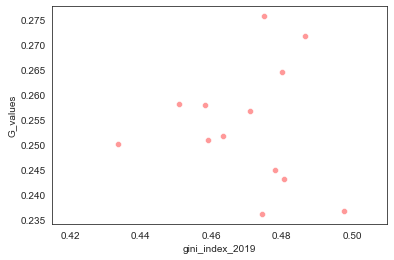

In [30]:
# Plot G data vs gini_index
sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G', color=[1.0, 0.6, 0.6])
plt.ylabel('G_values')
plt.xlim(0.415, 0.51)
plt.savefig('figures/gini_index_vs_G_values_v3.png', dpi=250)
plt.show()